In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [254]:
file_path = './Data01/'
file_list = os.listdir(file_path)
print(file_list)
df_rawdata_dust = pd.read_excel(file_path+file_list[0])
df_rawdata_weather = pd.read_excel(file_path+file_list[1])

['dust.xlsx', 'weather.xlsx']


In [255]:
df_rawdata_dust.info()
df_rawdata_dust.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      744 non-null    object 
 1   아황산가스   740 non-null    float64
 2   일산화탄소   740 non-null    float64
 3   오존      740 non-null    float64
 4   이산화질소   740 non-null    float64
 5   PM10    725 non-null    float64
 6   PM2.5   739 non-null    float64
dtypes: float64(6), object(1)
memory usage: 40.8+ KB


,날짜,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2.5
0,2021-01-01 01,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01 02,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01 03,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01 04,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01 05,0.004,0.5,0.010,0.026,NaN,14.0


In [256]:
df_rawdata_weather.info()
df_rawdata_weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   지점       743 non-null    int64         
 1   지점명      743 non-null    object        
 2   일시       743 non-null    datetime64[ns]
 3   기온(°C)   743 non-null    float64       
 4   풍속(m/s)  743 non-null    float64       
 5   강수량(mm)  743 non-null    float64       
 6   습도(%)    743 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 40.8+ KB


,지점,지점명,일시,기온(°C),풍속(m/s),강수량(mm),습도(%)
0,400,강남,2021-01-01 01:00:00,-7.2,0.6,0.0,57.5
1,400,강남,2021-01-01 02:00:00,-7.6,0.7,0.0,57.5
2,400,강남,2021-01-01 03:00:00,-8.2,0.6,0.0,62.0
3,400,강남,2021-01-01 04:00:00,-8.1,0.5,0.0,60.5
4,400,강남,2021-01-01 05:00:00,-8.7,1.3,0.0,66.4


1. 종속변수(미세먼지) 나머지 독립변수간 관계
2. 독립변화에 따른 종속변수의 예측

## Dust 데이터 전처리

In [257]:
df_rawdata_dust.describe()

,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2.5
count,740.000000,740.000000,740.000000,740.000000,725.000000,739.000000
mean,0.003654,0.563243,0.014154,0.030422,33.325517,21.833559
std,0.000628,0.164593,0.010689,0.014664,19.930029,12.222892
min,0.002000,0.300000,0.001000,0.006000,3.000000,3.000000
25%,0.003000,0.400000,0.003000,0.017000,20.000000,13.000000
50%,0.004000,0.500000,0.014000,0.030000,29.000000,19.000000
75%,0.004000,0.700000,0.024000,0.043000,43.000000,29.000000
max,0.006000,1.200000,0.037000,0.063000,163.000000,72.000000


In [258]:
df_mod00_dust = df_rawdata_dust.copy()

In [259]:
df_mod00_dust.columns = ['datetime', 'so2', 'co', 'o3', 'no2', 'PM10', 'PM2.5']
df_mod00_dust.datetime[0]

'2021-01-01 01'

In [260]:
df_mod00_dust['datetime'] = df_mod00_dust['datetime'].str.slice(start=0, stop=10)
df_mod00_dust.info()
df_mod00_dust.datetime[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  744 non-null    object 
 1   so2       740 non-null    float64
 2   co        740 non-null    float64
 3   o3        740 non-null    float64
 4   no2       740 non-null    float64
 5   PM10      725 non-null    float64
 6   PM2.5     739 non-null    float64
dtypes: float64(6), object(1)
memory usage: 40.8+ KB


'2021-01-01'

In [262]:
df_mod00_dust['datetime'] = pd.to_datetime(df_mod00_dust['datetime'])
df_mod00_dust.info()
df_mod00_dust.datetime[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  744 non-null    datetime64[ns]
 1   so2       740 non-null    float64       
 2   co        740 non-null    float64       
 3   o3        740 non-null    float64       
 4   no2       740 non-null    float64       
 5   PM10      725 non-null    float64       
 6   PM2.5     739 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 40.8 KB


Timestamp('2021-01-01 00:00:00')

In [266]:
df_mod00_dust['year'] = df_mod00_dust['datetime'].dt.year
df_mod00_dust['month'] = df_mod00_dust['datetime'].dt.month
df_mod00_dust['day'] = df_mod00_dust['datetime'].dt.day
df_mod00_dust.info()
df_mod00_dust.head()
type(df_mod00_dust.year[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  744 non-null    datetime64[ns]
 1   so2       740 non-null    float64       
 2   co        740 non-null    float64       
 3   o3        740 non-null    float64       
 4   no2       740 non-null    float64       
 5   PM10      725 non-null    float64       
 6   PM2.5     739 non-null    float64       
 7   year      744 non-null    int64         
 8   month     744 non-null    int64         
 9   day       744 non-null    int64         
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 58.2 KB


numpy.int64

In [267]:
df_mod01_dust = df_mod00_dust.copy()
df_mod01_dust.isna().sum()

datetime     0
so2          4
co           4
o3           4
no2          4
PM10        19
PM2.5        5
year         0
month        0
day          0
dtype: int64

In [268]:
df_mod01_dust[df_mod01_dust['so2'].isna()]

,datetime,so2,co,o3,no2,PM10,PM2.5,year,month,day
279,2021-01-12,NaN,NaN,NaN,NaN,NaN,NaN,2021,1,12
280,2021-01-12,NaN,NaN,NaN,NaN,NaN,NaN,2021,1,12
689,2021-01-29,NaN,NaN,NaN,NaN,NaN,NaN,2021,1,29
690,2021-01-29,NaN,NaN,NaN,NaN,NaN,NaN,2021,1,29


In [269]:
df_mod01_dust[(df_mod01_dust['PM10'].isna()) | (df_mod01_dust['PM2.5'].isna())]

,datetime,so2,co,o3,no2,PM10,PM2.5,year,month,day
0,2021-01-01,0.004,0.4,0.021,0.018,NaN,12.0,2021,1,1
4,2021-01-01,0.004,0.5,0.010,0.026,NaN,14.0,2021,1,1
140,2021-01-06,0.003,0.6,0.008,0.035,NaN,13.0,2021,1,6
260,2021-01-11,0.004,0.7,0.001,0.049,NaN,31.0,2021,1,11
270,2021-01-12,0.004,0.7,0.002,0.040,NaN,44.0,2021,1,12
279,2021-01-12,NaN,NaN,NaN,NaN,NaN,NaN,2021,1,12
280,2021-01-12,NaN,NaN,NaN,NaN,NaN,NaN,2021,1,12
281,2021-01-12,0.003,0.9,0.001,0.052,NaN,NaN,2021,1,12
284,2021-01-12,0.004,1.0,0.001,0.056,NaN,56.0,2021,1,12
386,2021-01-17,0.004,0.4,0.027,0.010,NaN,16.0,2021,1,17


In [270]:
print(df_mod01_dust[df_mod01_dust['so2'].isna()].index)
df_mod01_dust = df_mod01_dust.fillna(method='ffill')


Int64Index([279, 280, 689, 690], dtype='int64')


In [271]:
df_mod01_dust.iloc[[278, 279, 280, 688, 689, 690],:]
# df_mod01_dust.isna().sum()

,datetime,so2,co,o3,no2,PM10,PM2.5,year,month,day
278,2021-01-12,0.004,0.7,0.003,0.051,48.0,48.0,2021,1,12
279,2021-01-12,0.004,0.7,0.003,0.051,48.0,48.0,2021,1,12
280,2021-01-12,0.004,0.7,0.003,0.051,48.0,48.0,2021,1,12
688,2021-01-29,0.003,0.4,0.028,0.016,15.0,10.0,2021,1,29
689,2021-01-29,0.003,0.4,0.028,0.016,15.0,10.0,2021,1,29
690,2021-01-29,0.003,0.4,0.028,0.016,15.0,10.0,2021,1,29


In [272]:
df_mod01_dust.isna().sum()
print(df_mod01_dust[df_mod01_dust['PM10'].isna()].index)
df_mod01_dust = df_mod01_dust.fillna(method='bfill')
df_mod01_dust.iloc[[0, 1],:]

Int64Index([0], dtype='int64')


,datetime,so2,co,o3,no2,PM10,PM2.5,year,month,day
0,2021-01-01,0.004,0.4,0.021,0.018,20.0,12.0,2021,1,1
1,2021-01-01,0.004,0.4,0.019,0.020,20.0,13.0,2021,1,1


In [273]:
df_mod01_dust.isna().sum()

datetime    0
so2         0
co          0
o3          0
no2         0
PM10        0
PM2.5       0
year        0
month       0
day         0
dtype: int64

In [274]:
df_result_dust = df_mod01_dust.copy()

## 날씨 데이터 전처리


In [275]:
df_rawdata_weather.info()
df_rawdata_weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   지점       743 non-null    int64         
 1   지점명      743 non-null    object        
 2   일시       743 non-null    datetime64[ns]
 3   기온(°C)   743 non-null    float64       
 4   풍속(m/s)  743 non-null    float64       
 5   강수량(mm)  743 non-null    float64       
 6   습도(%)    743 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 40.8+ KB


,지점,지점명,일시,기온(°C),풍속(m/s),강수량(mm),습도(%)
0,400,강남,2021-01-01 01:00:00,-7.2,0.6,0.0,57.5
1,400,강남,2021-01-01 02:00:00,-7.6,0.7,0.0,57.5
2,400,강남,2021-01-01 03:00:00,-8.2,0.6,0.0,62.0
3,400,강남,2021-01-01 04:00:00,-8.1,0.5,0.0,60.5
4,400,강남,2021-01-01 05:00:00,-8.7,1.3,0.0,66.4


In [300]:
df_mod00_weather = df_rawdata_weather.copy()
df_mod00_weather.describe(include='all')

C:\Users\leadl\AppData\Local\Temp\ipykernel_1336\1651260366.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_mod00_weather.describe(include='all')


,지점,지점명,일시,기온(°C),풍속(m/s),강수량(mm),습도(%)
count,743.0,743,743,743.000000,743.000000,743.000000,743.000000
unique,NaN,1,743,NaN,NaN,NaN,NaN
top,NaN,강남,2021-01-01 01:00:00,NaN,NaN,NaN,NaN
freq,NaN,743,1,NaN,NaN,NaN,NaN
first,NaN,NaN,2021-01-01 01:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,2021-01-31 23:00:00,NaN,NaN,NaN,NaN
mean,400.0,NaN,NaN,-1.937281,1.283715,0.033647,57.256393
std,0.0,NaN,NaN,6.523592,0.944535,0.219221,21.849992
min,400.0,NaN,NaN,-16.900000,0.000000,0.000000,16.400000
25%,400.0,NaN,NaN,-6.600000,0.600000,0.000000,40.350000


In [301]:
df_mod01_weather = df_mod00_weather.iloc[:,2:]
df_mod01_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   일시       743 non-null    datetime64[ns]
 1   기온(°C)   743 non-null    float64       
 2   풍속(m/s)  743 non-null    float64       
 3   강수량(mm)  743 non-null    float64       
 4   습도(%)    743 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 29.1 KB


In [302]:
df_mod01_weather.columns = ['date', 'temp', 'wind', 'rain', 'humid']
df_mod01_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    743 non-null    datetime64[ns]
 1   temp    743 non-null    float64       
 2   wind    743 non-null    float64       
 3   rain    743 non-null    float64       
 4   humid   743 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 29.1 KB


In [303]:
df_mod02_weather = df_mod01_weather.copy()

In [313]:
df_mod02_weather['date'] = pd.to_datetime(df_mod02_weather['date']).dt.date
# df_mod02_weather['date'] = df_mod02_weather['date'].astype(str)
df_mod02_weather.info()
df_mod02_weather.date[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    743 non-null    object 
 1   temp    743 non-null    float64
 2   wind    743 non-null    float64
 3   rain    743 non-null    float64
 4   humid   743 non-null    float64
dtypes: float64(4), object(1)
memory usage: 29.1+ KB


datetime.date(2021, 1, 1)

In [298]:
df_mod02_weather['date'] = df_mod02_weather['date'].astype(str)
df_mod02_weather['date'] = df_mod02_weather['date'].str.slice(start=0, stop=10)
df_mod02_weather.info()
df_mod02_weather.date[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    743 non-null    object 
 1   temp    743 non-null    float64
 2   wind    743 non-null    float64
 3   rain    743 non-null    float64
 4   humid   743 non-null    float64
dtypes: float64(4), object(1)
memory usage: 29.1+ KB


'2021-01-01'

In [305]:
print(len(df_mod02_weather[df_mod02_weather['rain'] == 0]))
df_mod02_weather['rain'] = df_mod02_weather['rain'].replace(0, 0.01)
df_mod02_weather['rain'].value_counts()

720


0.01    720
0.50      9
1.00      7
1.50      3
2.50      2
2.00      2
Name: rain, dtype: int64

In [314]:
df_result_weather = df_mod02_weather.copy()

# 데이터 병합

In [307]:
df_result_dust.datetime[0]

Timestamp('2021-01-01 00:00:00')

In [308]:
df_result01_dust = df_result_dust.iloc[:743,]

In [311]:
df_result02_dust = df_result01_dust.copy()
df_result02_dust['datetime'] = df_result02_dust['datetime'].dt.date
# df_result02_dust['datetime'] = df_result02_dust['datetime'].astype(str)
df_result02_dust.info()
df_result02_dust.datetime[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  743 non-null    object 
 1   so2       743 non-null    float64
 2   co        743 non-null    float64
 3   o3        743 non-null    float64
 4   no2       743 non-null    float64
 5   PM10      743 non-null    float64
 6   PM2.5     743 non-null    float64
 7   year      743 non-null    int64  
 8   month     743 non-null    int64  
 9   day       743 non-null    int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 58.2+ KB


datetime.date(2021, 1, 1)

In [315]:
df_result02_dust.merge(df_result_weather, how='left', left_on='datetime', right_on='date')

,datetime,so2,co,o3,no2,PM10,PM2.5,year,month,day,date,temp,wind,rain,humid
0,2021-01-01,0.004,0.4,0.021,0.018,20.0,12.0,2021,1,1,2021-01-01,-7.2,0.6,0.01,57.5
1,2021-01-01,0.004,0.4,0.021,0.018,20.0,12.0,2021,1,1,2021-01-01,-7.6,0.7,0.01,57.5
2,2021-01-01,0.004,0.4,0.021,0.018,20.0,12.0,2021,1,1,2021-01-01,-8.2,0.6,0.01,62.0
3,2021-01-01,0.004,0.4,0.021,0.018,20.0,12.0,2021,1,1,2021-01-01,-8.1,0.5,0.01,60.5
4,2021-01-01,0.004,0.4,0.021,0.018,20.0,12.0,2021,1,1,2021-01-01,-8.7,1.3,0.01,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17803,2021-01-31,0.003,0.6,0.006,0.049,45.0,24.0,2021,1,31,2021-01-31,7.4,0.6,0.01,51.0
17804,2021-01-31,0.003,0.6,0.006,0.049,45.0,24.0,2021,1,31,2021-01-31,6.5,1.0,0.01,59.4
17805,2021-01-31,0.003,0.6,0.006,0.049,45.0,24.0,2021,1,31,2021-01-31,7.7,1.0,0.01,60.3
17806,2021-01-31,0.003,0.6,0.006,0.049,45.0,24.0,2021,1,31,2021-01-31,6.8,0.6,0.01,63.7


In [161]:
df_final = pd.concat([df_result02_dust, df_result_weather], axis=1)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  743 non-null    object 
 1   so2       743 non-null    float64
 2   co        743 non-null    float64
 3   o3        743 non-null    float64
 4   no2       743 non-null    float64
 5   PM10      743 non-null    float64
 6   PM2.5     743 non-null    float64
 7   year      743 non-null    int64  
 8   month     743 non-null    int64  
 9   day       743 non-null    int64  
 10  date      743 non-null    object 
 11  temp      743 non-null    float64
 12  wind      743 non-null    float64
 13  rain      743 non-null    float64
 14  humid     743 non-null    float64
dtypes: float64(10), int64(3), object(2)
memory usage: 87.2+ KB


# 데이터 시각화

In [167]:
df_final00 = df_final.iloc[:,[1,2,3,4,5,6,10,11,12,13,14]]
df_final00

,so2,co,o3,no2,PM10,PM2.5,date,temp,wind,rain,humid
0,0.004,0.4,0.021,0.018,20.0,12.0,2021-01-01,-7.2,0.6,0.01,57.5
1,0.004,0.4,0.019,0.020,20.0,13.0,2021-01-01,-7.6,0.7,0.01,57.5
2,0.004,0.5,0.017,0.023,23.0,13.0,2021-01-01,-8.2,0.6,0.01,62.0
3,0.004,0.5,0.015,0.024,17.0,12.0,2021-01-01,-8.1,0.5,0.01,60.5
4,0.004,0.5,0.010,0.026,17.0,14.0,2021-01-01,-8.7,1.3,0.01,66.4
...,...,...,...,...,...,...,...,...,...,...,...
738,0.004,0.6,0.014,0.044,45.0,19.0,2021-01-31,7.4,0.6,0.01,51.0
739,0.004,0.7,0.002,0.057,45.0,23.0,2021-01-31,6.5,1.0,0.01,59.4
740,0.004,0.8,0.001,0.059,48.0,27.0,2021-01-31,7.7,1.0,0.01,60.3
741,0.003,1.0,0.001,0.061,46.0,26.0,2021-01-31,6.8,0.6,0.01,63.7


C:\Users\leadl\AppData\Local\Temp\ipykernel_1336\3009740996.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df_final00.corr(), annot=True, fmt='.2f', cmap='hot')


<AxesSubplot: >

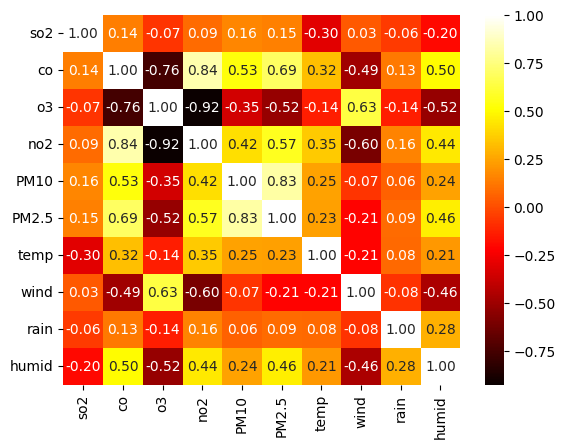

In [175]:
# upp_mat = np.tril(df_final00.corr())
sns.heatmap(data=df_final00.corr(), annot=True, fmt='.2f', cmap='hot')

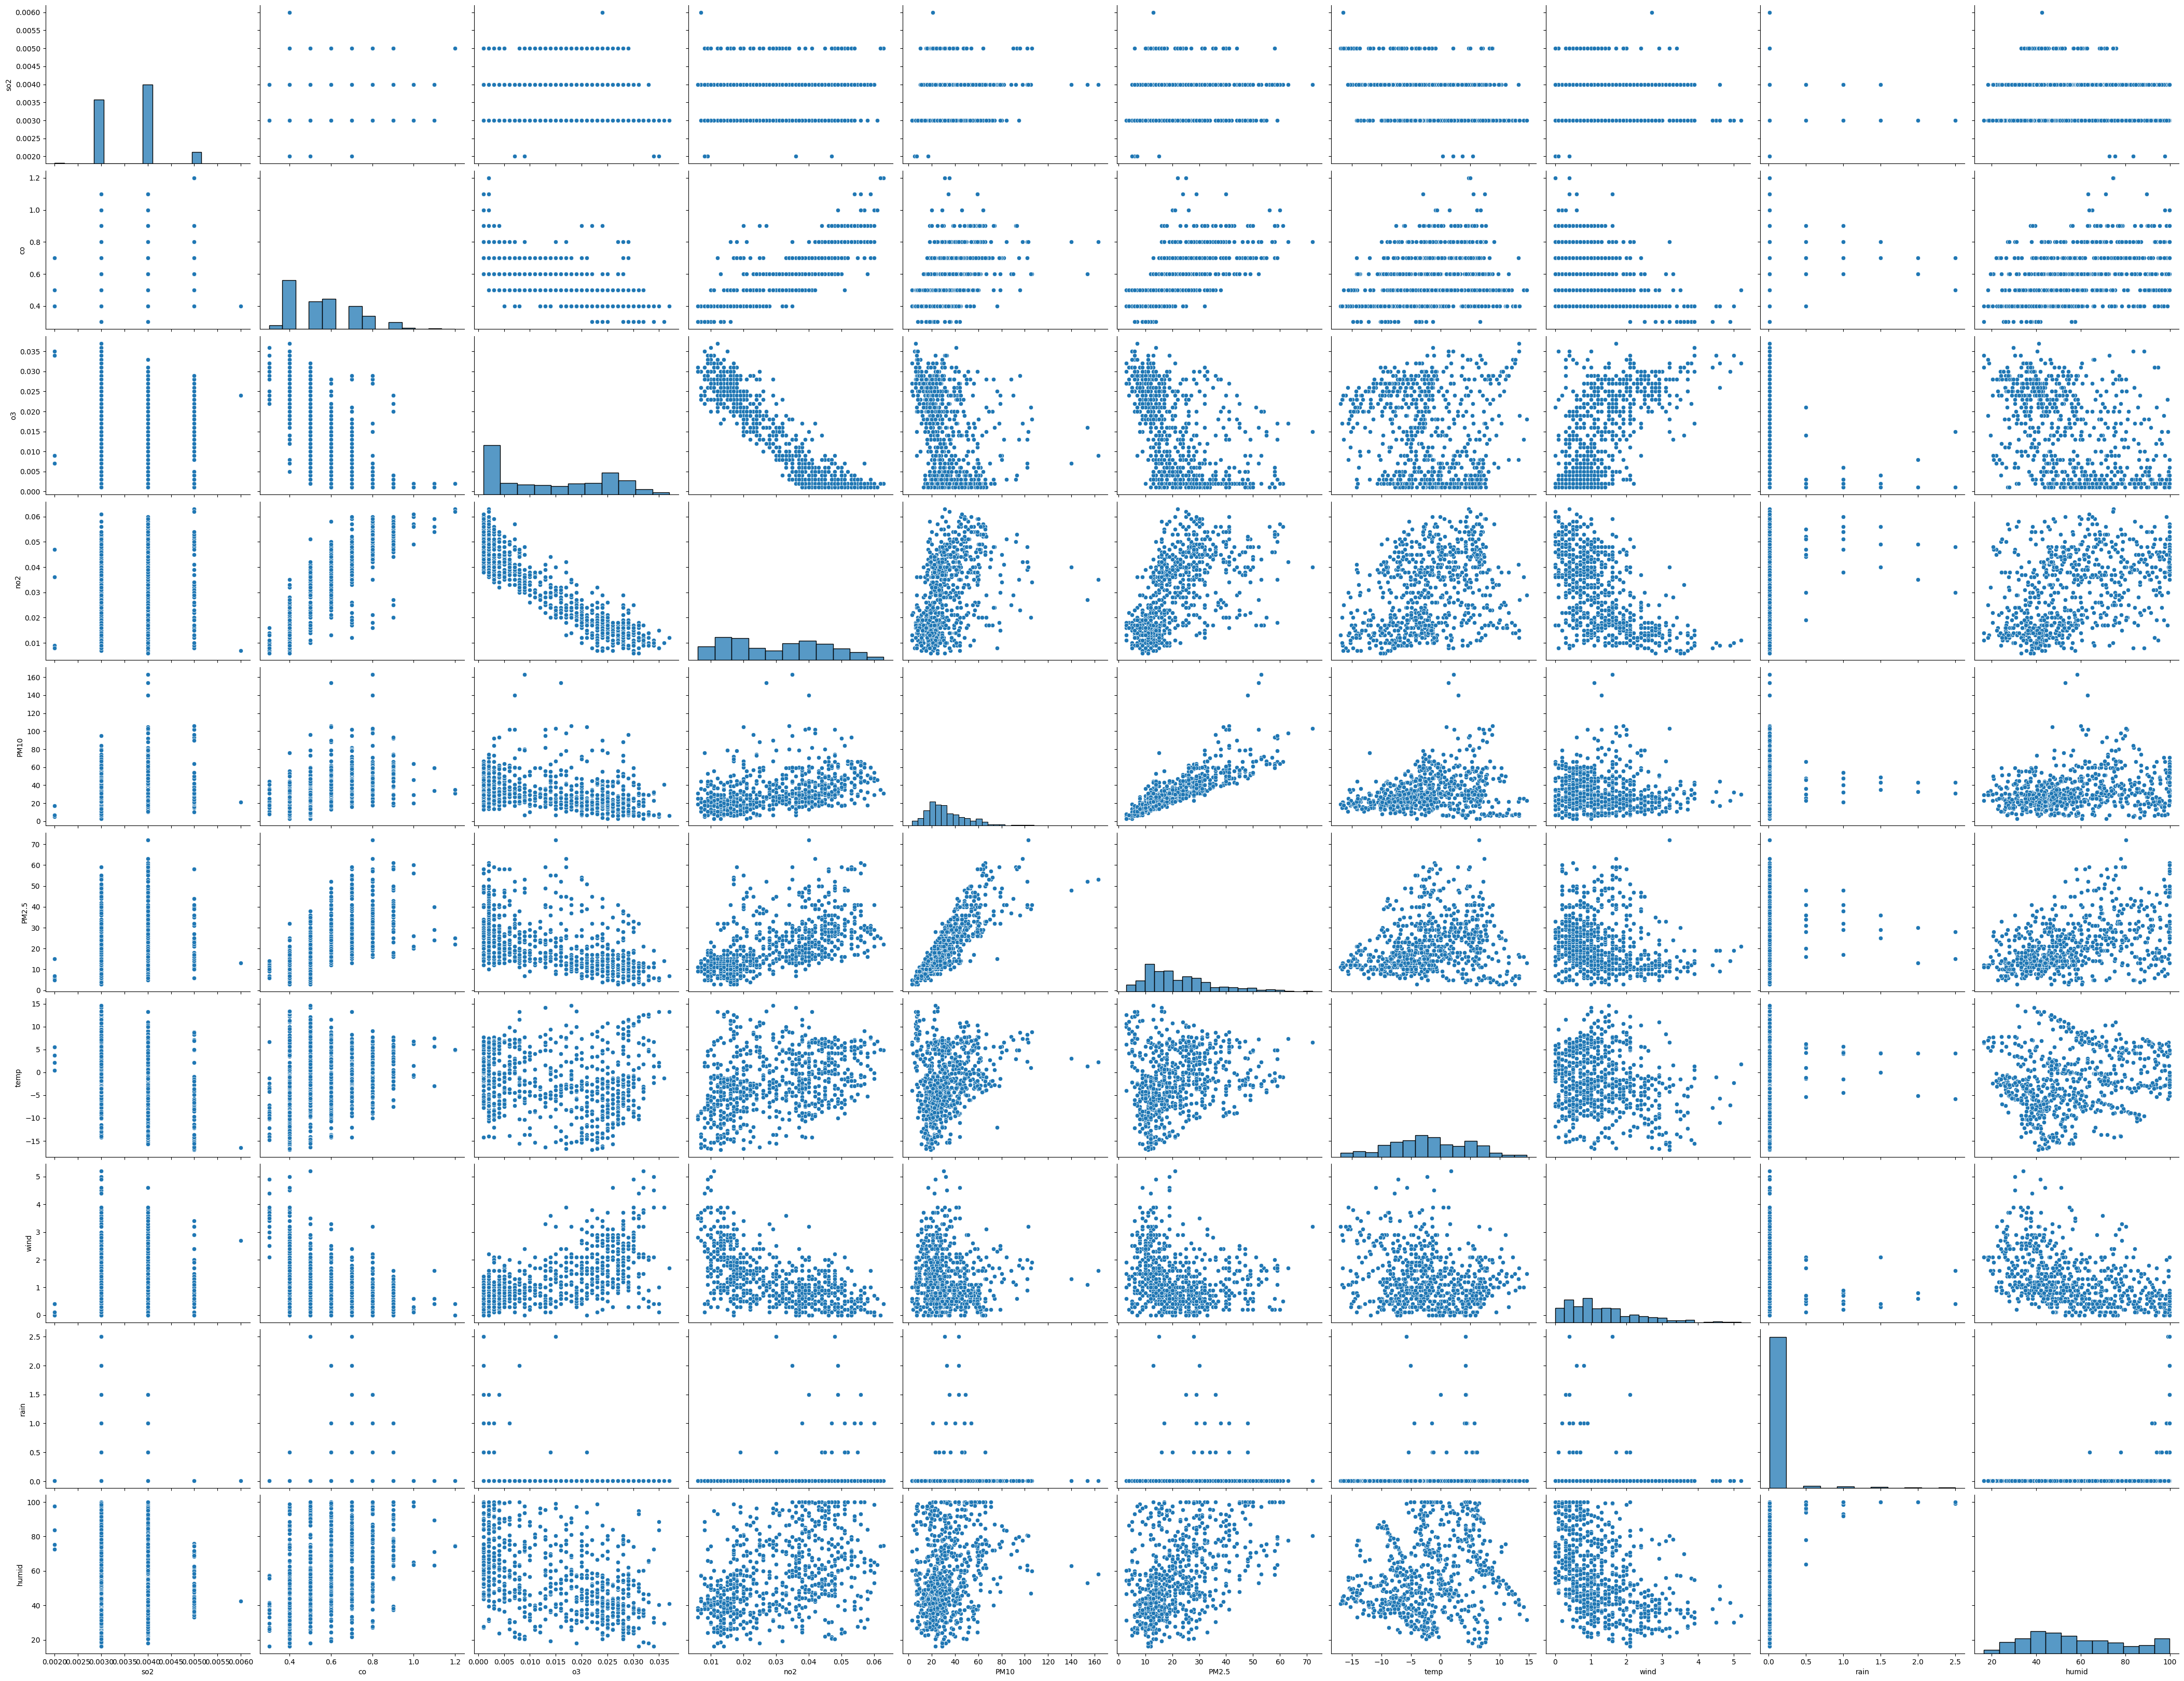

In [176]:
sns.pairplot(df_final00, height=3.3, aspect=1.3)
plt.show()

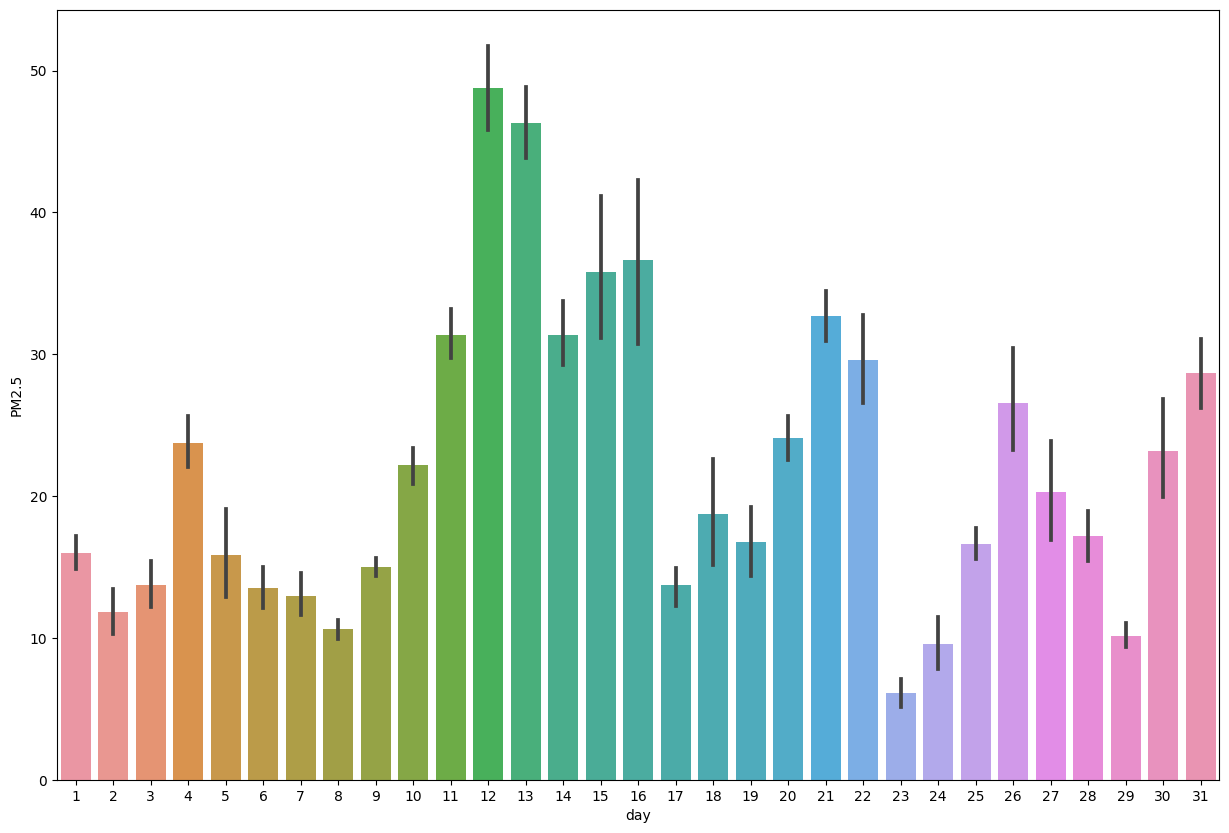

In [178]:
plt.figure(figsize=(15,10))
sns.barplot(x='day', y='PM2.5', data=df_final)
plt.show()

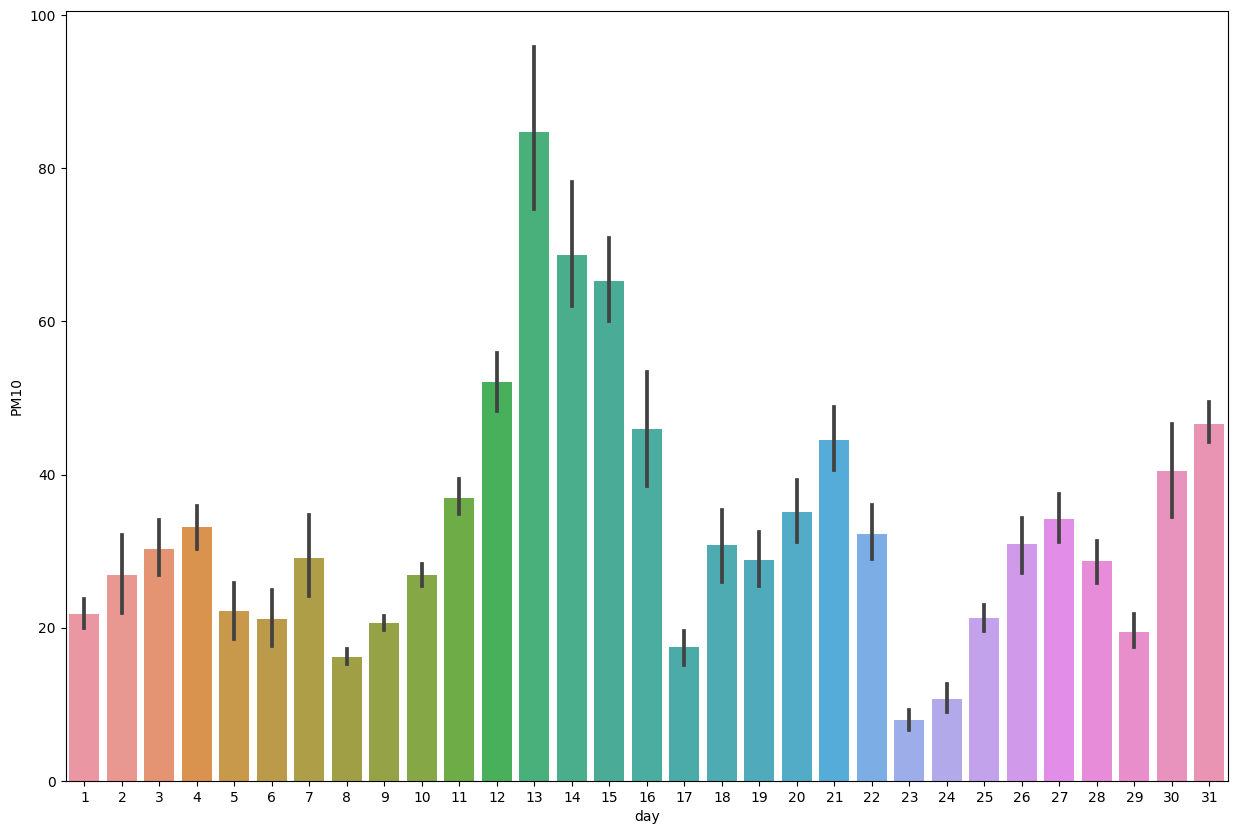

In [179]:
plt.figure(figsize=(15,10))
sns.barplot(x='day', y='PM10', data=df_final)
plt.show()